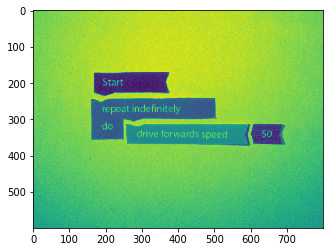

In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 as cv
import pytesseract
import os
from PIL import Image
from scipy.ndimage import label
from scipy.ndimage import binary_closing


A = np.array(Image.open('test_images/new.jpg'))
A = cv.resize(A, dsize=(800, 600), interpolation=cv.INTER_CUBIC)
A_gray = cv.cvtColor(A, cv.COLOR_BGR2GRAY)
plt.imshow(A_gray)
plt.show()

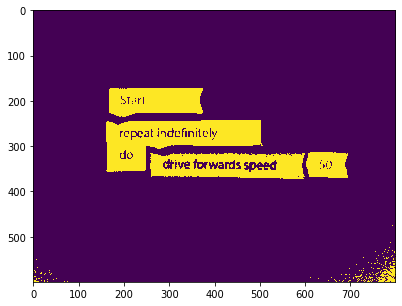

In [9]:
ret, A_bin = cv.threshold(A_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
A_bin = np.invert(A_bin)
plt.figure(figsize=(15, 5))
plt.imshow(A_bin)
plt.show()

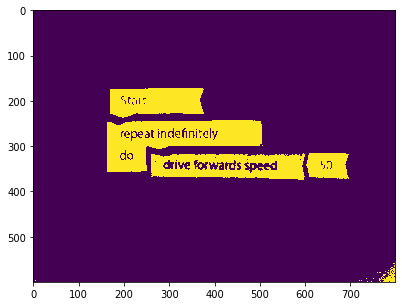

In [10]:
x = 2
kernel = cv.getStructuringElement(cv.MORPH_RECT,(x,x))
opening = cv.morphologyEx(A_bin, cv.MORPH_OPEN, kernel)

plt.figure(figsize=(15,5))
plt.imshow(opening)
plt.show()

Low pixel filter 1440.0 High pixel filter 144000.0
Initial components: 48
Number of selected components: 4


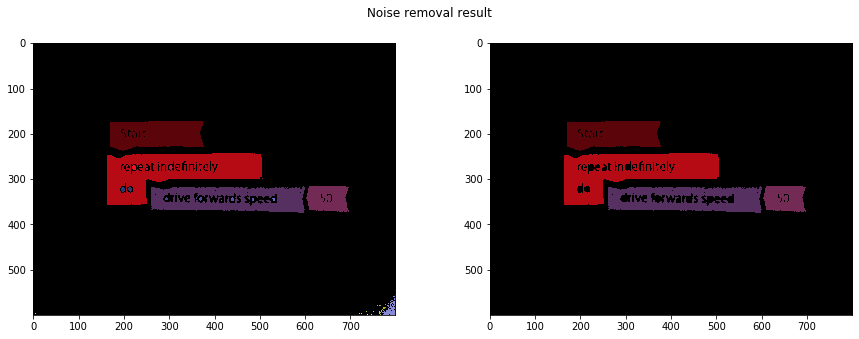

In [11]:
def filter_features(binary):
    features_list = label(binary)
    connected_components = features_list[0]
    processed_result = np.copy(connected_components)
    # remove a feature if it covers over 30% of the image or les than 0.03%
    low_filter = .003*np.prod(connected_components.shape)
    high_filter = .3*np.prod(connected_components.shape)
    print('Low pixel filter {} High pixel filter {}'.format(low_filter, high_filter))
    print('Initial components: {}'.format(features_list[1]))
    components = 0
    for feature in range(features_list[1]):
        if((np.count_nonzero(connected_components == feature) < low_filter) or (np.count_nonzero(connected_components == feature) > high_filter)):
            processed_result[connected_components == feature] = 0
            continue
        components += 1
        #print(np.count_nonzero(css == i))
    print('Number of selected components: {}'.format(components))
    return processed_result, connected_components


res, cc = filter_features(opening)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Noise removal result')
ax1.imshow(cc, cmap='gist_stern')
ax2.imshow(res, cmap='gist_stern')
fig.show()

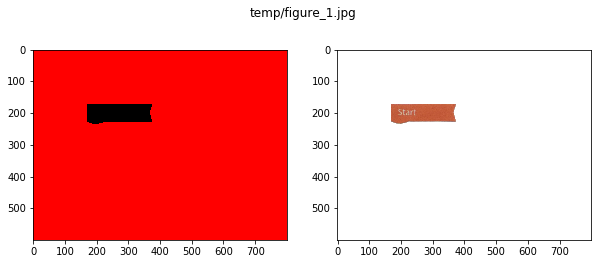

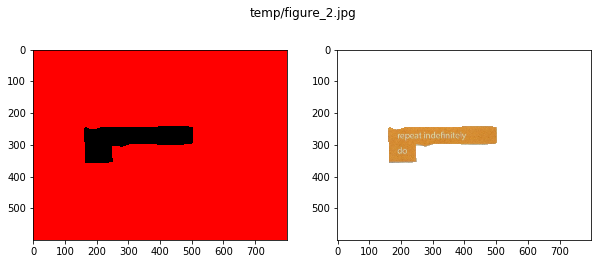

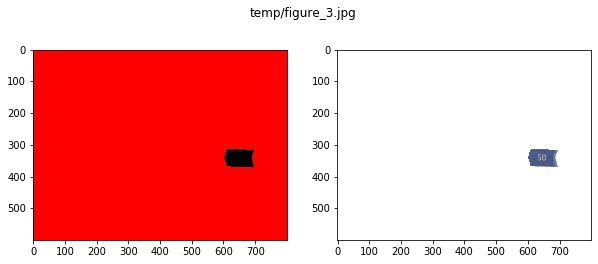

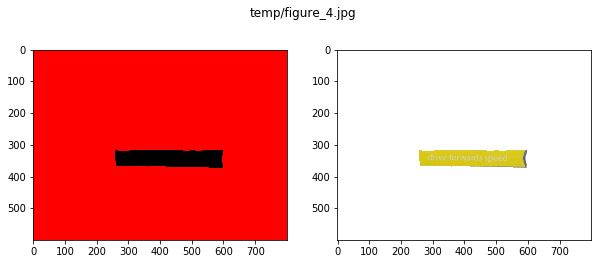

In [12]:
def fill_letters(segmentation, initial_image):
    low_filter = .003*np.prod(segmentation.shape)
    high_filter = .3*np.prod(segmentation.shape)
    window_size = 14 # crusial
    res = np.copy(segmentation)
    number = 0
    for part in range(np.max(segmentation)):
        A = (segmentation == part)
        # closing to each block
        B = binary_closing(A, structure=np.ones((window_size ,  window_size)))
        if(np.count_nonzero(B) < low_filter or np.count_nonzero(B) > high_filter):
            continue
        number += 1
        input_masked = np.copy(initial_image)
        input_masked[B == False] = 255

        filename = 'temp/figure_{}.jpg'.format(number)
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
        fig.suptitle(filename)
        ax1.imshow(B, cmap='flag')
        ax2.imshow(input_masked, cmap='flag')
        fig.show()   
        figure = Image.fromarray(input_masked)
        figure.save(filename) 
    return(number)

number = fill_letters(res, A)

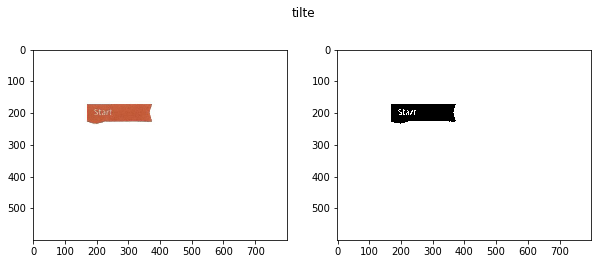

In [16]:
temp_directory = '/home/vasilisp/Desktop/tangibles-recognition/temp/'
pre_guess = 'repeat indefinitely do'
color_threshold = 40
bgr = np.array([72, 97, 195])
lower = np.array([bgr[0]-threshold, bgr[1]-threshold, bgr[2]-threshold]) 
upper = np.array([bgr[0]+threshold, bgr[1]+threshold, bgr[2]+threshold])
#for i in range(1, number+1):
figure = np.array(Image.open(temp_directory+'figure_1.jpg'))#'figure_'+str(i)+'.jpg'))
mask = cv.inRange(figure, lower, lower)
res = cv.bitwise_and(figure, figure, mask= mask)
figure_gray = cv.cvtColor(figure, cv.COLOR_BGR2GRAY)
ret1,threshold = cv.threshold(figure_gray,127,255,cv.THRESH_BINARY)
text_in_block = pytesseract.image_to_string(threshold, lang='eng')
print(text_in_block)
# planning on making a more sophisticated contains() method
# for checking tesseracgt output 
#if pre_guess in text_in_block:
#    print('tesseract says:'+ pre_guess)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
fig.suptitle('tilte')
ax1.imshow(figure, cmap='gray')
ax2.imshow(threshold, cmap='gray')
fig.show()  